In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors

In [5]:
# Function to calculate A_in
# Output: A_in
def A_in(u, delta):
    return (np.sqrt(1+ 4/(delta**2)) - 8 / (delta**3 * (delta**2 + 4)**1.5) * u**2/2 - 144 * (delta**4 + 2*delta**2 + 2) / (delta**5 * (delta**2 + 4)**3.5) * u**4/24)
    
# Function to calculate A_out
# Output: A_out
def A_out(u, delta):
    return ((2 + u**2) / (u*np.sqrt(u**2 + 4)) + (8*(u**2 + 1)) / (u**3 * (u**2 + 4)**2.5) * delta**2/2 + 48*(3*u**6 + 6*u**4 + 14*u**2 + 12) / (u**5 * (u**2 + 4)**4.5) * delta**4/24)

def A_intermediate(u, delta):
    return (A_out(1.1*delta, delta)*(u - 0.9*delta)/(0.2*delta) + A_in(0.9*delta, delta)*(1.1*delta - u)/(0.2*delta))

# Function to calculate the magnification of a finite sized circular source with constant surface brightness by a point-lens in the geometrical optics limit
# r_S = source size
# D = Effective lensing distance
# theta_E = Einstein angle
# u = Position of the source
# Output: Magnification
def finite_source_size_effect(r_S, D, theta_E, u, num_sides):
    
    A = np.zeros([num_sides,num_sides])
    theta_S = r_S/(D)
    delta = theta_S/theta_E
    
    Obs = np.where(u <= 0.9*delta, A_in(u, delta), 0)
    Obs += np.where(u >= 1.1*delta, A_out(u, delta), 0)
    Obs += np.where((u > 0.9*delta)&(u < 1.1*delta), A_intermediate(u, delta), 0)
    
    return Obs

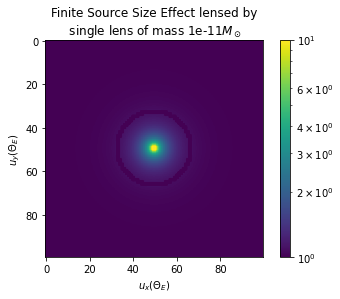

In [66]:
num_sides = 100
arr_lens_plane_pos = np.zeros((num_sides,num_sides))

pixel_length_x = 0.1
pixel_length_y = pixel_length_x

u = np.zeros((num_sides, num_sides))

for j in range(num_sides):
    tmp_y = ((j - num_sides/2) + 0.5)*pixel_length_y
    for i in range(num_sides):
        tmp_x = ((i - num_sides/2) + 0.5)*pixel_length_x

        beta1 = np.sqrt((tmp_x)**2 + tmp_y**2)

        u[i,j] = beta1

A = finite_source_size_effect(0.1*7e+8, 1e9*3e+16, 4.5e-17, u, num_sides)
A = np.where(np.abs(A-1.1) < 0.01, 0, A)

#fig = plt.figure(figsize=(8,6))
plt.imshow(A.reshape([100,100]), norm=colors.LogNorm(vmin=1e0, vmax=10**1))
plt.title('Finite Source Size Effect lensed by\n single lens of mass 1e-11$M_\odot$')
plt.xlabel('$u_x(\Theta_E)$')
plt.ylabel("$u_y(\Theta_E)$")
plt.colorbar()
plt.savefig('fin_source_single_lens M_11.png')
plt.show()

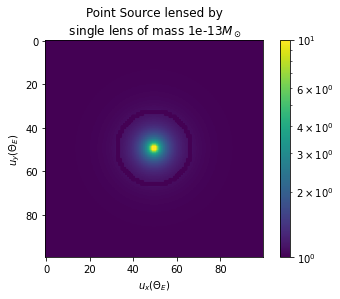

In [65]:
num_sides = 100
arr_lens_plane_pos = np.zeros((num_sides,num_sides))

pixel_length_x = 0.1
pixel_length_y = pixel_length_x

u = np.zeros((num_sides, num_sides))

for j in range(num_sides):
    tmp_y = ((j - num_sides/2) + 0.5)*pixel_length_y
    for i in range(num_sides):
        tmp_x = ((i - num_sides/2) + 0.5)*pixel_length_x

        beta1 = np.sqrt((tmp_x)**2 + tmp_y**2)

        u[i,j] = beta1

A = (u**2+2)/(u*np.sqrt(u**2+4))
A = np.where(np.abs(A-1.1) < 0.01, 0, A)

#fig = plt.figure(figsize=(8,6))
plt.imshow(A.reshape([100,100]), norm=colors.LogNorm(vmin=1e0, vmax=10**1))
plt.title('Point Source lensed by\n single lens of mass 1e-13$M_\odot$')
plt.xlabel('$u_x(\Theta_E)$')
plt.ylabel("$u_y(\Theta_E)$")
plt.colorbar()
plt.savefig('point_source_single_lens M_13.png')
plt.show()

In [67]:
from astropy.coordinates import Distance    # For changing from redshift to distance
from astropy.cosmology import WMAP7, WMAP9  # For changing from redshift to distance
from astropy import units as u

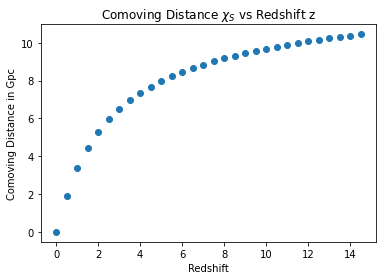

In [73]:
redshift_input = np.arange(30)/2
DS = WMAP9.comoving_distance(redshift_input).value/1e3
plt.xlabel('Redshift')
plt.ylabel('Comoving Distance in Gpc')
plt.title('Comoving Distance $\chi_S$ vs Redshift z')
plt.scatter(redshift_input, DS)